In [23]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import nltk
from nltk.stem import WordNetLemmatizer

### 라벨링된 텍스트 데이터를 시각화하는 방법을 배운다.

In [7]:
def load(df_path: str | os.PathLike):
    df = pd.read_csv(df_path)
    return df

In [78]:
def transform(
    df: str, 
    target_column: str,
    sentiment_flag: int, 
    text_column: str
):
    nltk.download('wordnet')
    texts = df[df[target_column]==sentiment_flag][text_column]
    emojis = {
        ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
        ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
        ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
        ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
        '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
        '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
        ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'
    }

    ## Defining set containing all stopwords in english.
    stopwordlist = [
        'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
        'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
        'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
        'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
        'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
        'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
        'into', 'im', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
        'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
        'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
        's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
        't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
        'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
        'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
        'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
        'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
        "youve", 'your', 'yours', 'yourself', 'yourselves', 'quot', 'amp'
    ]

    
    # Defining the lemmatizer and patterns
    lemmatizer = WordNetLemmatizer()
    patterns = [
        [r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", ' '],
        ['@[^\s]+', " "],
        ["[^a-zA-Z0-9]", " "],
        [r"(.)\1\1+", r"\1\1"],     
    ]
    process_texts = []
    for text in texts:
        text = text.lower()
        
        for emoji in emojis.keys():
            text = text.replace(emoji, "EMOJI" + emojis[emoji])
            
        for pattern, replace in patterns:
            text = re.sub(pattern, replace, text)
        
        text_words = ''
        for word in text.split():
            if len(word) > 1 and word not in stopwordlist:
                word = lemmatizer.lemmatize(word)
                text_words += (word+' ')

        process_texts.append(text_words)
    
    return process_texts

In [79]:
def analysis(texts: list[str], title: str, ax: plt.Axes) -> plt.Axes:
    import random
    texts = random.choices(texts, k=min(200, len(texts))) # sampling 200 texts
    wc = wordcloud.WordCloud(
        width=800, 
        height=600, 
        max_words=200,
        collocations=False # remove repeated words
    ).generate(' '.join(texts))
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)
    return ax

In [80]:
def visualize_with_axes(
    posi_texts: list[str],
    nega_texts: list[str],
    posi_title: str,
    nega_title: str
):
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    analysis(posi_texts, posi_title, axes[0])
    analysis(nega_texts, nega_title, axes[1])
    
    plt.tight_layout()
    plt.show()  

[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


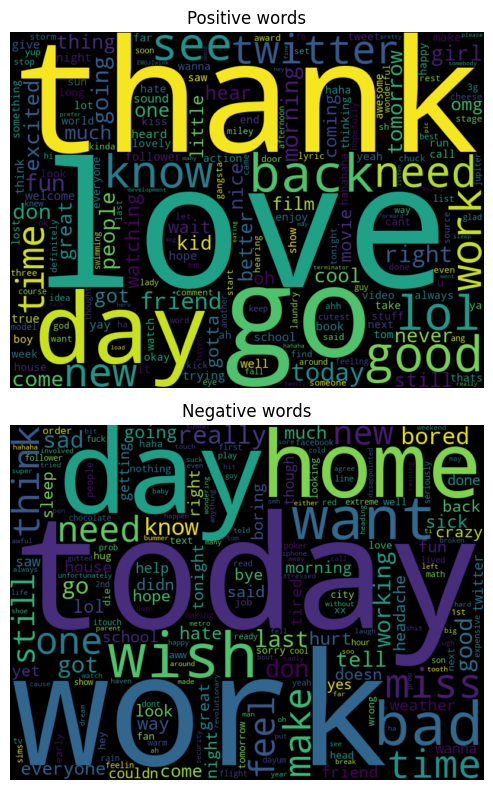

In [81]:
# Load data
df = load("training_with_colnames.csv")
sub_df = df[['target_sentiment', 'text']]

# Transform data
posi_texts = transform(sub_df, 'target_sentiment', 4, 'text')
nega_texts = transform(sub_df, 'target_sentiment', 0, 'text')

visualize_with_axes(posi_texts, nega_texts, 'Positive words', 'Negative words')